# LOAD Modules

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

import wfdb
import pyedflib


%matplotlib inline
%load_ext autoreload
%autoreload 2


# Download Data

In [2]:
redownload = False
if redownload:
    wfdb.dl_database('eegmmidb/', 'RawData',overwrite=False)
    print("Data was downloaded.")
else:
    print("Data was NOT downloaded.")

Data was NOT downloaded.


# Read single data

### Using pyEDFlib

Type: <class 'numpy.ndarray'>  Shape: (64, 9760)


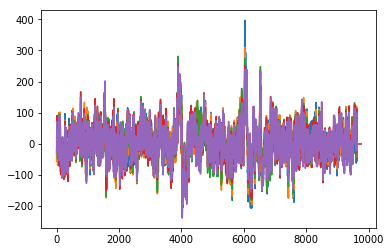

In [3]:
f = pyedflib.EdfReader("RawData/S001/S001R01.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)
    
for i in range(5):
    plt.plot(sigbufs[i,:])
    
print("Type:", type(sigbufs)," Shape:",sigbufs.shape)


### Using MNE

Extracting EDF parameters from RawDataMNE/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Used Annotations descriptions: ['T0']


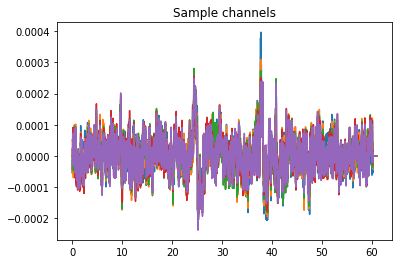

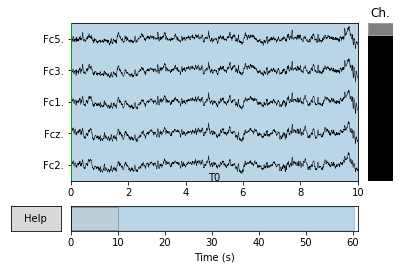

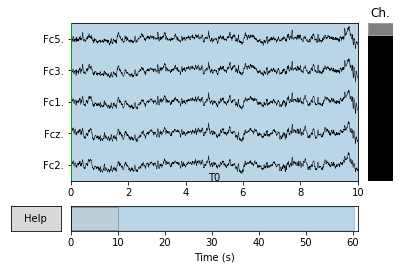

In [4]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test
from mne.viz.utils import center_cmap


# load and preprocess data ####################################################
subject = 1  # use data from subject 1
runs = [1]  

fnames = eegbci.load_data(subject, runs, path = 'RawDataMNE')
raws = [read_raw_edf(f, preload=True, stim_channel='auto') for f in fnames]
raw = concatenate_raws(raws)


# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = raw.info['sfreq']
data, times = raw[:5, :]
plt.plot(times, data.T)
plt.title('Sample channels')

raw.plot(n_channels=5, scalings='auto', title='Auto-scaled Data from arrays',
         show=True, block=True)

In [5]:
raw_numpy = raw.get_data()

print("Type:", type(raw_numpy)," Shape:",raw_numpy.shape)


Type: <class 'numpy.ndarray'>  Shape: (65, 9760)


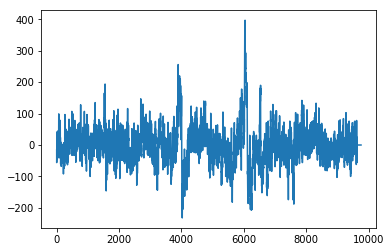

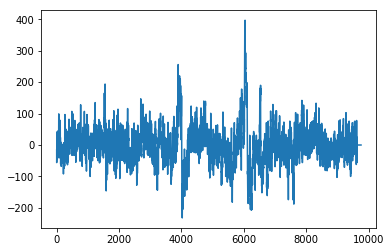

In [12]:
plt.plot(raw_numpy[0,:]*1e6)
plt.figure()
plt.plot(sigbufs[0,:])

In [17]:
raw_numpy[-1,-500:-1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.